# Tutorial 10: Estimating $\pi$ through simulation

In this tutorial, we will use a simulation approach to estimate $\pi$. To to do this, we imagine we have a circular dart board of radpinned to a square wall, and randomly throw darts at the wall. We then take note of where the darts hit the wall and whether or not they fall within our outwith the dart board (assuming the dart must hit somewhere within that square wall).




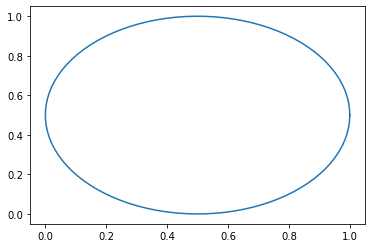

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 100) 
r = 0.5
# Plot circle using equation of circle
plt.figure()
plt.plot(r*np.cos(theta) + 0.5, r*np.sin(theta) + 0.5)
plt.show()

<font size="4">

## Part 1
Construct a function `darts(n)` that will simulate the dart throwing experiment and return a $n \times 2$ numpy array of both the sample of points and whether they are inside the circle (1) or outside the circle (0).

Now for $n\in [50,100,1000,10000]$, simulate $n$ points within the unit square and determine whether or not these fall inside the circle.

Determine how mathematically you could use the proportion of points that fall inside the circle to estimate $\pi$. Using these simulated points, calculate an estimate of $\pi$ for each $n$ and store these in a dictionary with the keys being the size of $n$ and the values the estimate of $\pi$.  

<p style='text-align:right;'> <b> [4 Marks] </b> </p>


In [2]:
# your code goes here
def darts(n):
    points = np.random.rand(n, 2)
    # (x - center_x)^2 + (y - center_y)^2 < radius^2
    distance = (points[:, 0] - 0.5)**2 + (points[:, 1] - 0.5)**2
    inside_circle = np.where(distance <= 0.5**2, 1, 0)
    # return n * 3 array with position and 0/1
    result = np.column_stack((points, inside_circle))
    return result

n_values = [50, 100, 1000, 10000]

points = {}
pi_estimates = {}
for n in n_values:
    # "points" store the darts() result
    point = darts(n)
    points[n] = point
    # number in the circle / number in the square = π/4
    pi_estimate = 4 * np.sum(point[:, 2]) / n
    # "pi_estimates" return the dictionary 
    pi_estimates[n] = pi_estimate

# pi_estimates

In [3]:
# Don't edit this cell

if not "darts" in globals():
    raise NotImplementedError("darts has not been defined")

if not "darts" in globals():
    raise NotImplementedError("darts has not been defined")

<font size="4">
    
## Part 2
    
Produce a single plot made up of four subplots, with each showing the dart throws for varying $n$. Ensure that there is a visual distinction between the points falling inside the circle and those falling outwith it and print your estimate of $\pi$ and the corresponding $n$ in the title of each subplot.

Using the function you have already created, now calculate an estimate of $\pi$ for a range of $n$ from 100 to 10000 by 100 and plot a scatterplot of the estimate against $n$.

<p style='text-align:right;'> <b> [2 Marks] </b> </p>

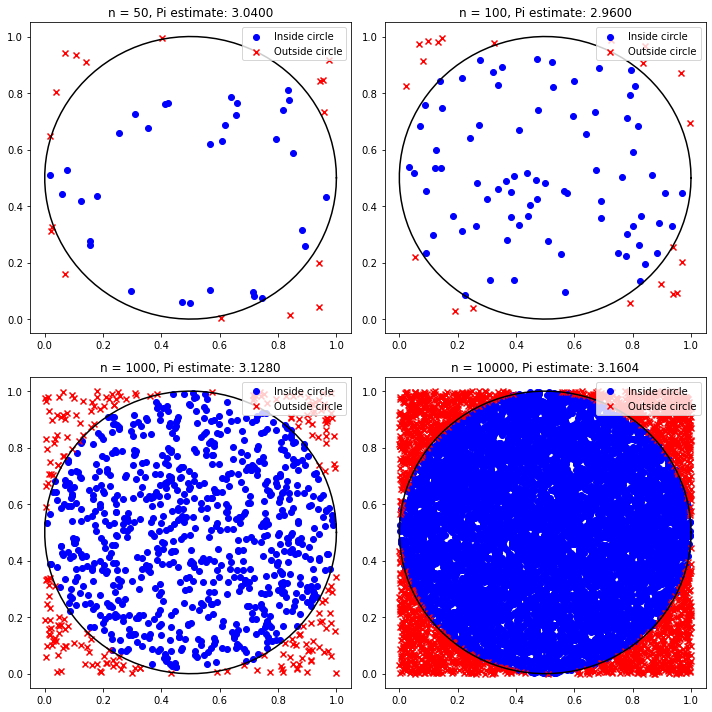

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, n in enumerate(n_values):
    # dart throws for varying n from Part 1
    points = darts(n)
    pi_estimate = pi_estimates[n]
    inside_points = points[points[:, 2] == 1]
    outside_points = points[points[:, 2] == 0]
    
    # determine the row and column position of the subplots
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    
    # points falling inside the circle
    ax.scatter(inside_points[:, 0], inside_points[:, 1], color='blue', marker='o', label='Inside circle')
    # points falling outwith
    ax.scatter(outside_points[:, 0], outside_points[:, 1], color='red', marker='x', label='Outside circle')
    # plot the circle 
    ax.plot(r*np.cos(theta) + 0.5, r*np.sin(theta) + 0.5,color='black')
    
    ax.set_title(f'n = {n}, Pi estimate: {pi_estimate:.4f}')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


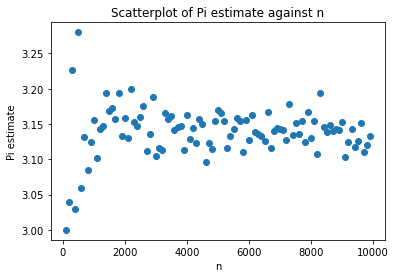

In [5]:
# Scatter plot for n from 100 to 10000

pi_estimates_2 = {}
for n in np.arange(100, 10000, 100):
    # "points" store the darts() result
    points = darts(n)
    # "pi_estimates_2" return the dictionary 
    pi_estimate_2 = 4 * np.sum(points[:, 2]) / n
    pi_estimates_2[n] = pi_estimate_2

plt.scatter(list(pi_estimates_2.keys()), list(pi_estimates_2.values()))
plt.xlabel('n')
plt.ylabel('Pi estimate')
plt.title('Scatterplot of Pi estimate against n')
plt.show()

In [6]:
# Don't edit this cell

if not "darts" in globals():
    raise NotImplementedError("darts has not been defined")